In [ ]:
Rozpoznawanie zdjęc ze zbioru MNIST przy użyciu sieci neuronowych

Autorzy:

Karol Kraus s20687
Piotr Mastalerz s21911

Zadanie:

Nauczyć sieć neuronową rozpoznawać zdjecią ze zbioru CIFAR10

Przygotowanie środowika do pracy

python
numpy
matplotlib
tensorflow


In [1]:
# ładowanie danych mnist
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential

# importowanie różnych typów warstw ukrytych
from tensorflow.keras.layers import Conv2D, MaxPooling2D,\
Dense, Flatten

# Optymalizator Adama
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Podział danych na trening i testowanie
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# Drukowanie wymiaru zestawu danych
print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)


Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


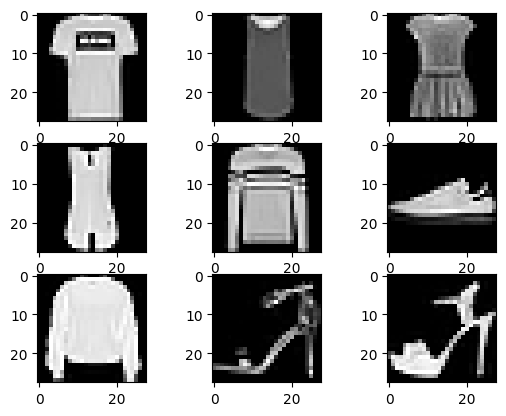

In [3]:
for i in range(1, 10):

	# Tworzenie siatki 3x3 i umieszczenie w niej obrazu
	plt.subplot(3, 3, i)

	# Wstawianie i-tego obrazu z mapą kolorów ( szary)
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

# Display the entire plot
plt.show()


In [4]:
def model_arch():
	models = Sequential()


	models.add(Conv2D(64, (5, 5),
					padding="same",
					activation="relu",
					input_shape=(28, 28, 1)))


	models.add(MaxPooling2D(pool_size=(2, 2)))
	models.add(Conv2D(128, (5, 5), padding="same",
					activation="relu"))

	models.add(MaxPooling2D(pool_size=(2, 2)))
	models.add(Conv2D(256, (5, 5), padding="same",
					activation="relu"))

	models.add(MaxPooling2D(pool_size=(2, 2)))


	models.add(Flatten())
	models.add(Dense(256, activation="relu"))


	models.add(Dense(10, activation="softmax"))
	return models


In [5]:
model = model_arch()

model.compile(optimizer=Adam(learning_rate=1e-3),
			loss='sparse_categorical_crossentropy',
			metrics=['sparse_categorical_accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 256)         819456    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 256)        0

In [6]:
history = model.fit(
	trainX.astype(np.float32), trainy.astype(np.float32),
	epochs=10,
	steps_per_epoch=100,
	validation_split=0.33
)


Epoch 1/10
100/100 [==============================] - 48s 474ms/step - loss: 3.0921 - sparse_categorical_accuracy: 0.6537 - val_loss: 0.4355 - val_sparse_categorical_accuracy: 0.8410
Epoch 2/10
100/100 [==============================] - 47s 467ms/step - loss: 0.3808 - sparse_categorical_accuracy: 0.8642 - val_loss: 0.3549 - val_sparse_categorical_accuracy: 0.8708
Epoch 3/10
100/100 [==============================] - 47s 469ms/step - loss: 0.3186 - sparse_categorical_accuracy: 0.8838 - val_loss: 0.3312 - val_sparse_categorical_accuracy: 0.8793
Epoch 4/10
100/100 [==============================] - 47s 468ms/step - loss: 0.2783 - sparse_categorical_accuracy: 0.8975 - val_loss: 0.3151 - val_sparse_categorical_accuracy: 0.8854
Epoch 5/10
100/100 [==============================] - 47s 467ms/step - loss: 0.2539 - sparse_categorical_accuracy: 0.9074 - val_loss: 0.3069 - val_sparse_categorical_accuracy: 0.8867
Epoch 6/10
100/100 [==============================] - 47s 467ms/step - loss: 0.2358 -

In [7]:
model.save_weights('./model.h5', overwrite=True)


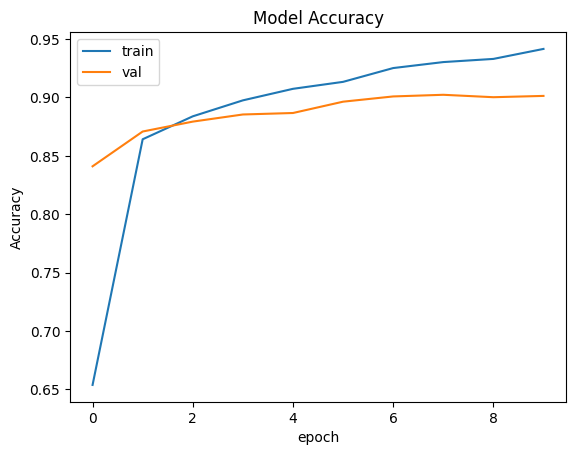

In [8]:
# wykres dokładność / epoka
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


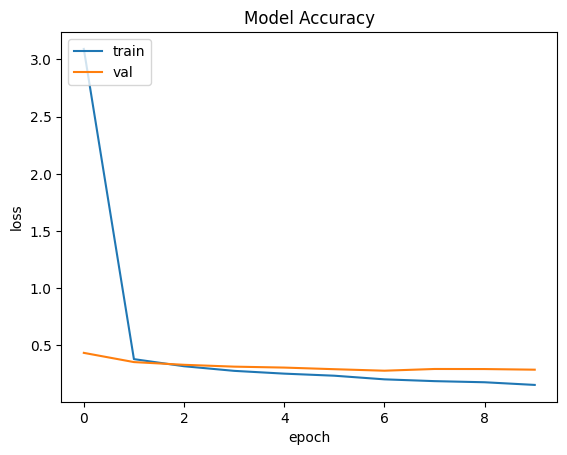

In [9]:
# wykres strata / epoka
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


1/1 [==============================] - 0s 58ms/step
ankle_boots


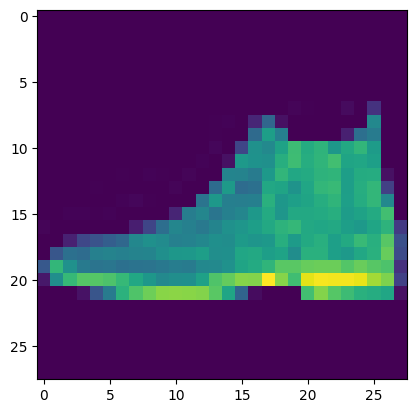

In [10]:
# Dla zestawu danych MNIST istnieje 10 etykiet wyjściowych
labels = ['t_shirt', 'trouser', 'pullover',
		'dress', 'coat', 'sandal', 'shirt',
		'sneaker', 'bag', 'ankle_boots']

# Predykcja
predictions = model.predict(testX[:1])
label = labels[np.argmax(predictions)]

print(label)
plt.imshow(testX[:1][0])
plt.show()
